Bayesian Mean Estimate 

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from pathlib import Path

from BME import run_BME, run_BME_benchmark


# Global plot style settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "cm",            # Use Computer Modern for math
    "font.size": 14,                     # Base font size
    "axes.labelsize": 16,                # Axis label font size
    "axes.titlesize": 16,                # Title font size
    "legend.fontsize": 13,               # Legend font size
    "xtick.labelsize": 13,               # X tick label size
    "ytick.labelsize": 13,               # Y tick label size
    "axes.linewidth": 1.2,               # Thicker axis lines
    "xtick.direction": "in",             # x-yick direction
    "ytick.direction": "in",             # y-tick direction
    "text.usetex": False,                # Enable LaTeX if needed
    "figure.dpi": 150,                   # Good resolution for screens
    "savefig.dpi": 300                   # High resolution for saving
})

In [2]:
# Define function for nice plotting
def PlotSettings(ax, gridlines=False, minimalist=False):
    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # Minimalist style
    if minimalist:
        # Hide top and right spines (borders)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # Ticks only on bottom and left
        ax.tick_params(which='both', top=False, right=False)
    else:
        # Tick parameters
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='major', length=7, width=1.2)
        ax.tick_params(which='minor', length=4, width=1)
    # Optional grid
    if gridlines:
        ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
        ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)

In [3]:
# Loading data
parent = Path(os.path.dirname(os.getcwd()))
date = "091027"
#state = "cat2"
state = "tora12"

data_path = parent / "data" / "dataframes" / date
print(data_path)
data = pd.read_csv(data_path / (state + '.csv'))
# Convert to numpy array
x_values = np.array(data)
x_values = np.swapaxes(x_values, 0, 1)

# Make array from 0 to 165 in steps of 15
thetas = np.arange(0, 166, 15)
# Convert to radians
thetas = np.radians(thetas)
theta0 = np.deg2rad(147)
x0 = -0.08

#theta0 = 0
#x0 = 0

N = 10
nrho = 4000
num_bins = 200
eps=0.1

rho_est, logL_chain = run_BME(thetas-theta0, 
              x_values-x0,
              num_bins=num_bins,
              nrho=nrho,
              N=N,
              epsilon=eps
              )

print(rho_est)
#np.save("rho_est.npy", rho_est)



/Users/jansc/Documents/QIS/Spring2025/SCIQIS/Homodyne-Tomography/data/dataframes/091027
Computing Markov chain...

[[ 4.02457667e-01+0.00000000e+00j -2.16107267e-01+1.87886612e-01j
   8.35697842e-02-2.17069483e-02j -6.25446610e-02+7.73211575e-02j
   1.74862509e-02-8.17191815e-03j -1.19613278e-02+1.67447308e-02j
   5.11454557e-03-1.00793521e-02j -5.88821487e-03+5.15734748e-04j
  -1.81045962e-04-1.96541657e-03j -3.33004652e-03-1.24670622e-03j]
 [-2.16107267e-01-1.87886612e-01j  4.31991703e-01+0.00000000e+00j
  -1.64766653e-02+4.24200530e-02j  1.40589523e-01+1.64622159e-02j
  -5.08285650e-03+2.77522393e-02j  4.14359568e-02+6.78860966e-03j
  -5.14388043e-03+1.30368557e-02j  1.07211690e-02+7.09971449e-03j
  -1.01575126e-03+2.48340476e-03j  3.85902042e-03+5.15756050e-03j]
 [ 8.35697842e-02+2.17069483e-02j -1.64766653e-02-4.24200530e-02j
   7.07389868e-02+0.00000000e+00j  6.22823192e-03-8.54278495e-04j
   1.99924380e-02+3.41832201e-03j  6.19548210e-03-3.56145634e-03j
   6.40948016e-03-2.64634

In [ ]:
%timeit run_BME(thetas-theta0,x_values-x0,num_bins=num_bins,nrho=nrho,N=N,epsilon=eps)

Computing Markov chain...

Computing Markov chain...

Computing Markov chain...

Computing Markov chain...

Computing Markov chain...

Computing Markov chain...

Computing Markov chain...

Computing Markov chain...



In [ ]:
from WignerDensity import rho_to_Wigner

# Define function for nice plotting
def PlotSettings(ax, gridlines=False, minimalist=False):
    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # Minimalist style
    if minimalist:
        # Hide top and right spines (borders)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # Ticks only on bottom and left
        ax.tick_params(which='both', top=False, right=False)
    else:
        # Tick parameters
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='major', length=7, width=1.2)
        ax.tick_params(which='minor', length=4, width=1)
    # Optional grid
    if gridlines:
        ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
        ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)

def plot_Wigner(rho_est):
    # Plot Wigner function
    xvec = np.linspace(-4, 4, 200)
    W = rho_to_Wigner(rho_est, xvec, xvec)
    X, Y = np.meshgrid(xvec, xvec)
    vmin, vmax = -1/np.pi, 1/np.pi
    levels = np.linspace(vmin, vmax, 41)  # force levels across full range

    fig, ax = plt.subplots(figsize=(6, 5))
    # Filled contours with transparency
    contour_filled = ax.contourf(X, Y, W, levels=levels,
                                cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax)
    # Colorbar
    cbar = fig.colorbar(contour_filled, ax=ax, ticks=[-1/np.pi, 1/np.pi])
    cbar.ax.set_yticklabels([r"$-1/\pi$", r"$1/\pi$"])  # custom tick labels if needed
    # Move axes to cross at (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Set x- and y-ticks skipping 0
    ax.set_xticks([-3, -2, -1, 1, 2, 3])
    ax.set_yticks([-3, -2, -1, 1, 2, 3])
    PlotSettings(ax, minimalist=True)
    plt.show()

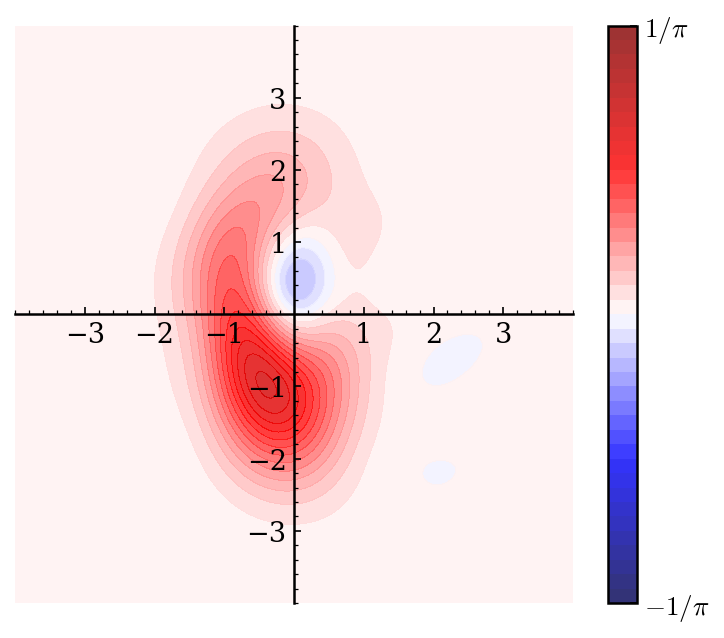

In [ ]:
plot_Wigner(rho_est)

In [ ]:
N_values = [i for i in range(3, 11)]
nbin_values = [i*20 for i in range(3, 11)]

delta_ll, runtime_grid = run_BME_benchmark(
    thetas, x_values, N_values, nbin_values,[10000],
)

Running iMLE for N=3, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 9100.15it/s]


Running iMLE for N=3, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8530.89it/s]


Running iMLE for N=3, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7922.30it/s]


Running iMLE for N=3, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7808.58it/s]


Running iMLE for N=3, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7124.33it/s]


Running iMLE for N=3, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6974.06it/s]


Running iMLE for N=3, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8291.32it/s]


Running iMLE for N=3, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7999.33it/s]


Running iMLE for N=4, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:00<00:00, 10024.73it/s]


Running iMLE for N=4, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8670.36it/s]


Running iMLE for N=4, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7947.37it/s]


Running iMLE for N=4, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7259.20it/s]


Running iMLE for N=4, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8430.84it/s]


Running iMLE for N=4, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7978.38it/s]


Running iMLE for N=4, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7593.19it/s]


Running iMLE for N=4, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7060.65it/s]


Running iMLE for N=5, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 9729.60it/s]


Running iMLE for N=5, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8962.78it/s]


Running iMLE for N=5, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8259.51it/s]


Running iMLE for N=5, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8017.44it/s]


Running iMLE for N=5, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7284.77it/s]


Running iMLE for N=5, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6960.10it/s]


Running iMLE for N=5, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6572.94it/s]


Running iMLE for N=5, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6182.37it/s]


Running iMLE for N=6, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 9373.19it/s]


Running iMLE for N=6, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8768.86it/s]


Running iMLE for N=6, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8111.58it/s]


Running iMLE for N=6, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7448.73it/s]


Running iMLE for N=6, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6850.28it/s]


Running iMLE for N=6, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6289.64it/s]


Running iMLE for N=6, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5527.46it/s]


Running iMLE for N=6, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5526.38it/s]


Running iMLE for N=7, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 9120.73it/s]


Running iMLE for N=7, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7860.39it/s]


Running iMLE for N=7, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7289.34it/s]


Running iMLE for N=7, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6617.50it/s]


Running iMLE for N=7, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5551.97it/s]


Running iMLE for N=7, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5237.50it/s]


Running iMLE for N=7, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4662.26it/s]


Running iMLE for N=7, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4450.09it/s]


Running iMLE for N=8, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7176.28it/s]


Running iMLE for N=8, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6752.22it/s]


Running iMLE for N=8, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6167.19it/s]


Running iMLE for N=8, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5918.07it/s]


Running iMLE for N=8, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5410.23it/s]


Running iMLE for N=8, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5492.70it/s]


Running iMLE for N=8, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5009.72it/s]


Running iMLE for N=8, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4546.22it/s]


Running iMLE for N=9, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6705.42it/s]


Running iMLE for N=9, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6331.78it/s]


Running iMLE for N=9, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5714.65it/s]


Running iMLE for N=9, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5344.09it/s]


Running iMLE for N=9, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4893.23it/s]


Running iMLE for N=9, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4619.26it/s]


Running iMLE for N=9, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 3990.31it/s]


Running iMLE for N=9, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 3931.81it/s]


Running iMLE for N=10, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6815.50it/s]


Running iMLE for N=10, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6475.17it/s]


Running iMLE for N=10, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5686.32it/s]


Running iMLE for N=10, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5603.06it/s]


Running iMLE for N=10, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5048.80it/s]


Running iMLE for N=10, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4469.94it/s]


Running iMLE for N=10, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4134.48it/s]


Running iMLE for N=10, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4498.45it/s]


In [5]:
def plot_results(delta_ll, runtime_grid, N_values, nbin_values):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

    # First heatmap: Δ log-likelihood
    c0 = axs[0].pcolormesh(nbin_values, N_values, delta_ll, shading="auto", cmap="viridis")
    axs[0].set_title("Δ log-likelihood per sample")
    axs[0].set_xlabel("Number of bins")
    axs[0].set_ylabel("Fock cutoff N")
    axs[0].set_xticks(nbin_values)
    axs[0].set_yticks(N_values)
    fig.colorbar(c0, ax=axs[0])

    # Second heatmap: Runtime
    c1 = axs[1].pcolormesh(nbin_values, N_values, runtime_grid, shading="auto", cmap="magma")
    axs[1].set_title("Runtime (s)")
    axs[1].set_xlabel("Number of bins")
    axs[1].set_ylabel("Fock cutoff N")
    axs[1].set_xticks(nbin_values)
    axs[1].set_yticks(N_values)
    fig.colorbar(c1, ax=axs[1])

    plt.show()

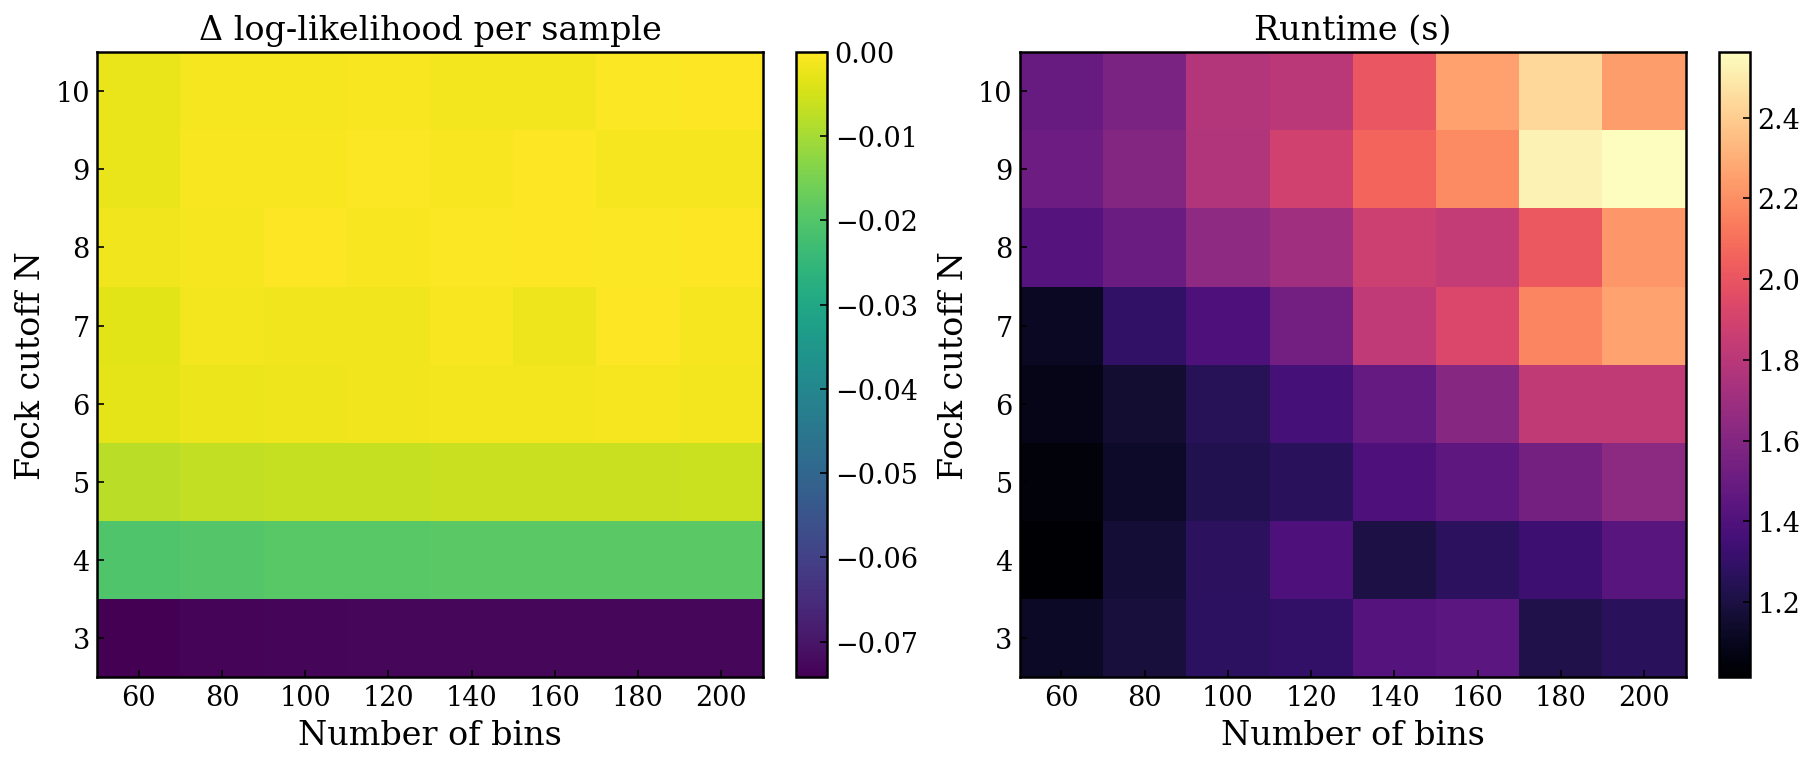

In [6]:
plot_results(delta_ll, runtime_grid, N_values, nbin_values)

In [22]:
N_values = [8]
nbin_values = [160]

nrhos = [500, 1000]+[2000 * i for i in range(1, 11)]  # 1000, 2000, ..., 10000

delta_ll, runtime_grid = run_BME_benchmark(
    thetas, x_values, N_values, nbin_values,nrhos,

)

Running BME for nrho=500
Computing Markov chain...



100%|██████████| 500/500 [00:00<00:00, 4731.40it/s]


Running BME for nrho=1000
Computing Markov chain...



100%|██████████| 1000/1000 [00:00<00:00, 5260.30it/s]


Running BME for nrho=2000
Computing Markov chain...



100%|██████████| 2000/2000 [00:00<00:00, 5020.56it/s]


Running BME for nrho=4000
Computing Markov chain...



100%|██████████| 4000/4000 [00:00<00:00, 5507.08it/s]


Running BME for nrho=6000
Computing Markov chain...



100%|██████████| 6000/6000 [00:01<00:00, 5144.14it/s]


Running BME for nrho=8000
Computing Markov chain...



100%|██████████| 8000/8000 [00:01<00:00, 5390.99it/s]


Running BME for nrho=10000
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5380.06it/s]


Running BME for nrho=12000
Computing Markov chain...



100%|██████████| 12000/12000 [00:02<00:00, 5445.56it/s]


Running BME for nrho=14000
Computing Markov chain...



100%|██████████| 14000/14000 [00:02<00:00, 5354.08it/s]


Running BME for nrho=16000
Computing Markov chain...



100%|██████████| 16000/16000 [00:02<00:00, 5498.85it/s]


Running BME for nrho=18000
Computing Markov chain...



100%|██████████| 18000/18000 [00:03<00:00, 5569.10it/s]


Running BME for nrho=20000
Computing Markov chain...



100%|██████████| 20000/20000 [00:03<00:00, 5490.36it/s]


In [23]:
def plot_results_rho(delta_ll, runtime_grid, nrhos):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

    # Flatten arrays to ensure 1D
    delta_ll = np.ravel(delta_ll)
    runtime_grid = np.ravel(runtime_grid)

    # Δ log-likelihood per sample
    axs[0].plot(nrhos, delta_ll, marker='o')
    axs[0].set_title("Δ log-likelihood per sample")
    axs[0].set_xlabel("Number of states (nrhos)")
    axs[0].set_ylabel("Δ log-likelihood")

    # Runtime
    axs[1].plot(nrhos, runtime_grid, marker='o', color='orange')
    axs[1].set_title("Runtime (s)")
    axs[1].set_xlabel("Number of states (nrhos)")
    axs[1].set_ylabel("Runtime (s)")

    plt.show()


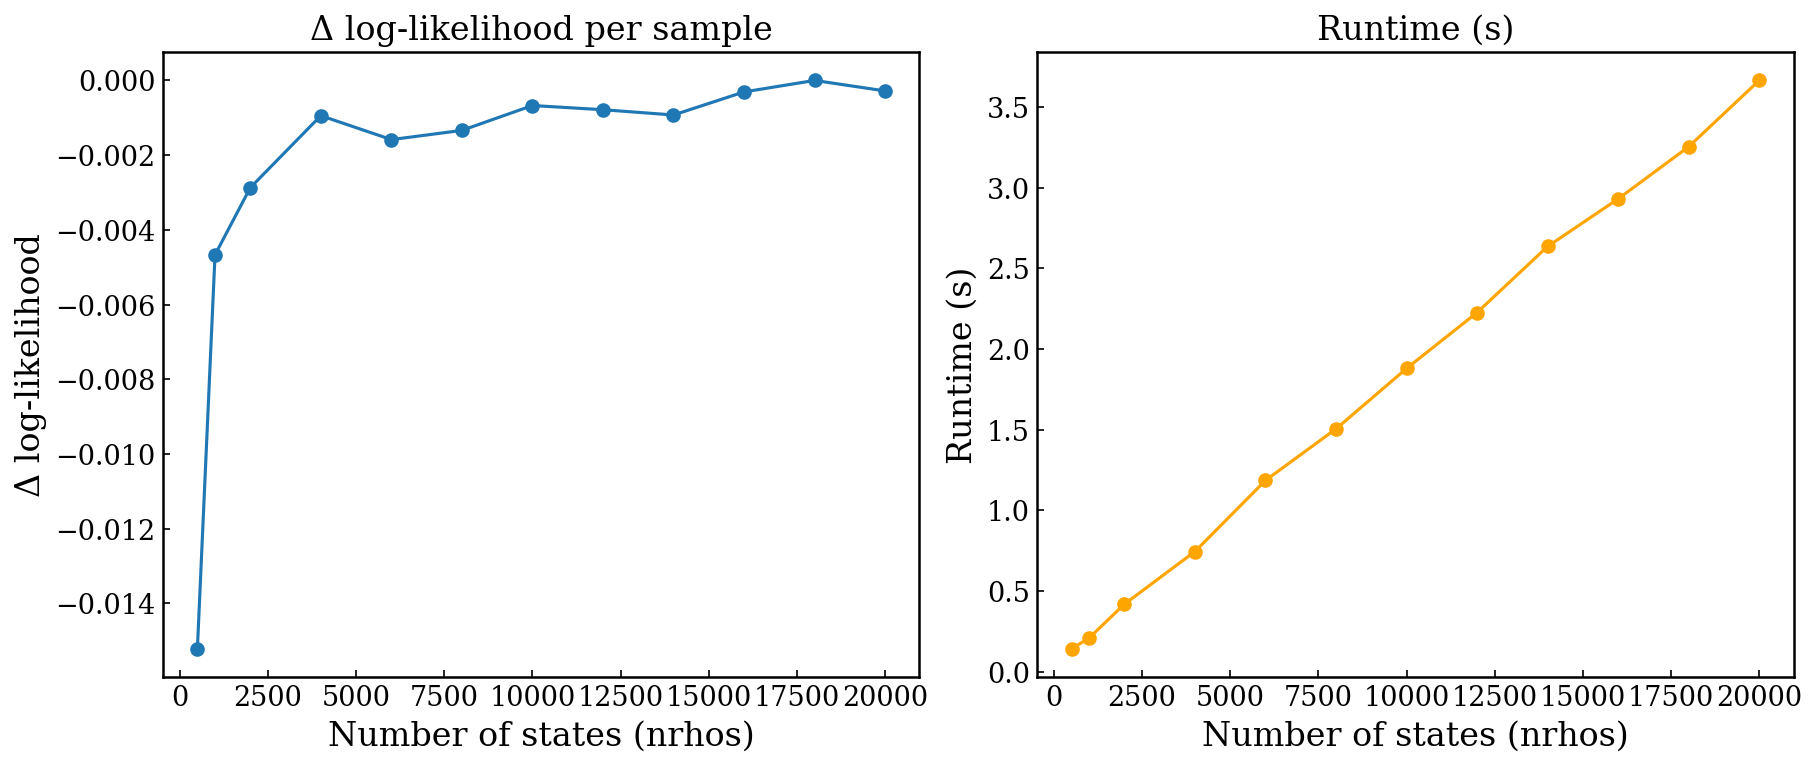

In [24]:
plot_results_rho(delta_ll, runtime_grid, nrhos)